<a href="https://colab.research.google.com/github/Odima-dev/Data-Science-and-Machine-Learning/blob/main/HousingPriceForecasts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Problem 1: Feature selection for practice

import pandas as pd

# Loading data
from google.colab import files
uploaded = files.upload()

# Reading the CSV
df = pd.read_csv('train.csv')

# Selecting features and target
X = df[['GrLivArea', 'YearBuilt']]
y = df['SalePrice']

# Checking shape
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print(X.head())
print(y.head())


Saving train.csv to train.csv
Features shape: (1460, 2)
Target shape: (1460,)
   GrLivArea  YearBuilt
0       1710       2003
1       1262       1976
2       1786       2001
3       1717       1915
4       2198       2000
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


Linear Regression MSE: 2182210639.2166743


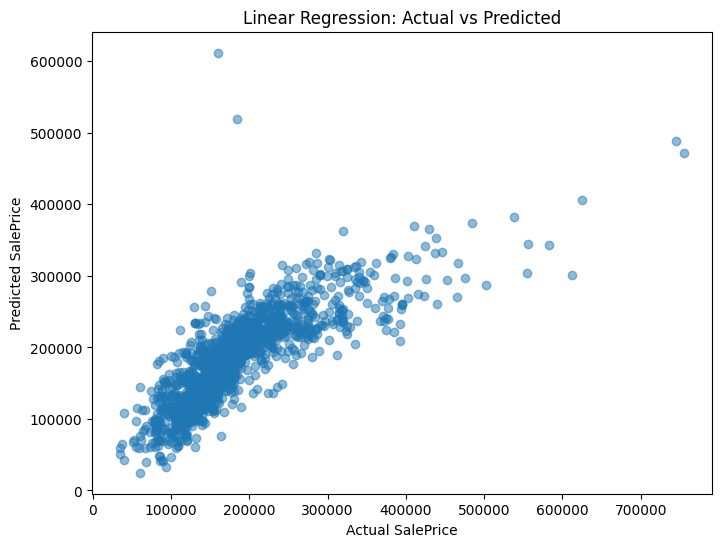

In [2]:
# Problem 2: Estimation and evaluation by linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Creating model
lr = LinearRegression()

# Fit
lr.fit(X, y)

# Predict
y_pred = lr.predict(X)

# Evaluating
mse_lr = mean_squared_error(y, y_pred)
print("Linear Regression MSE:", mse_lr)

# Visualizing: Scatter real vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


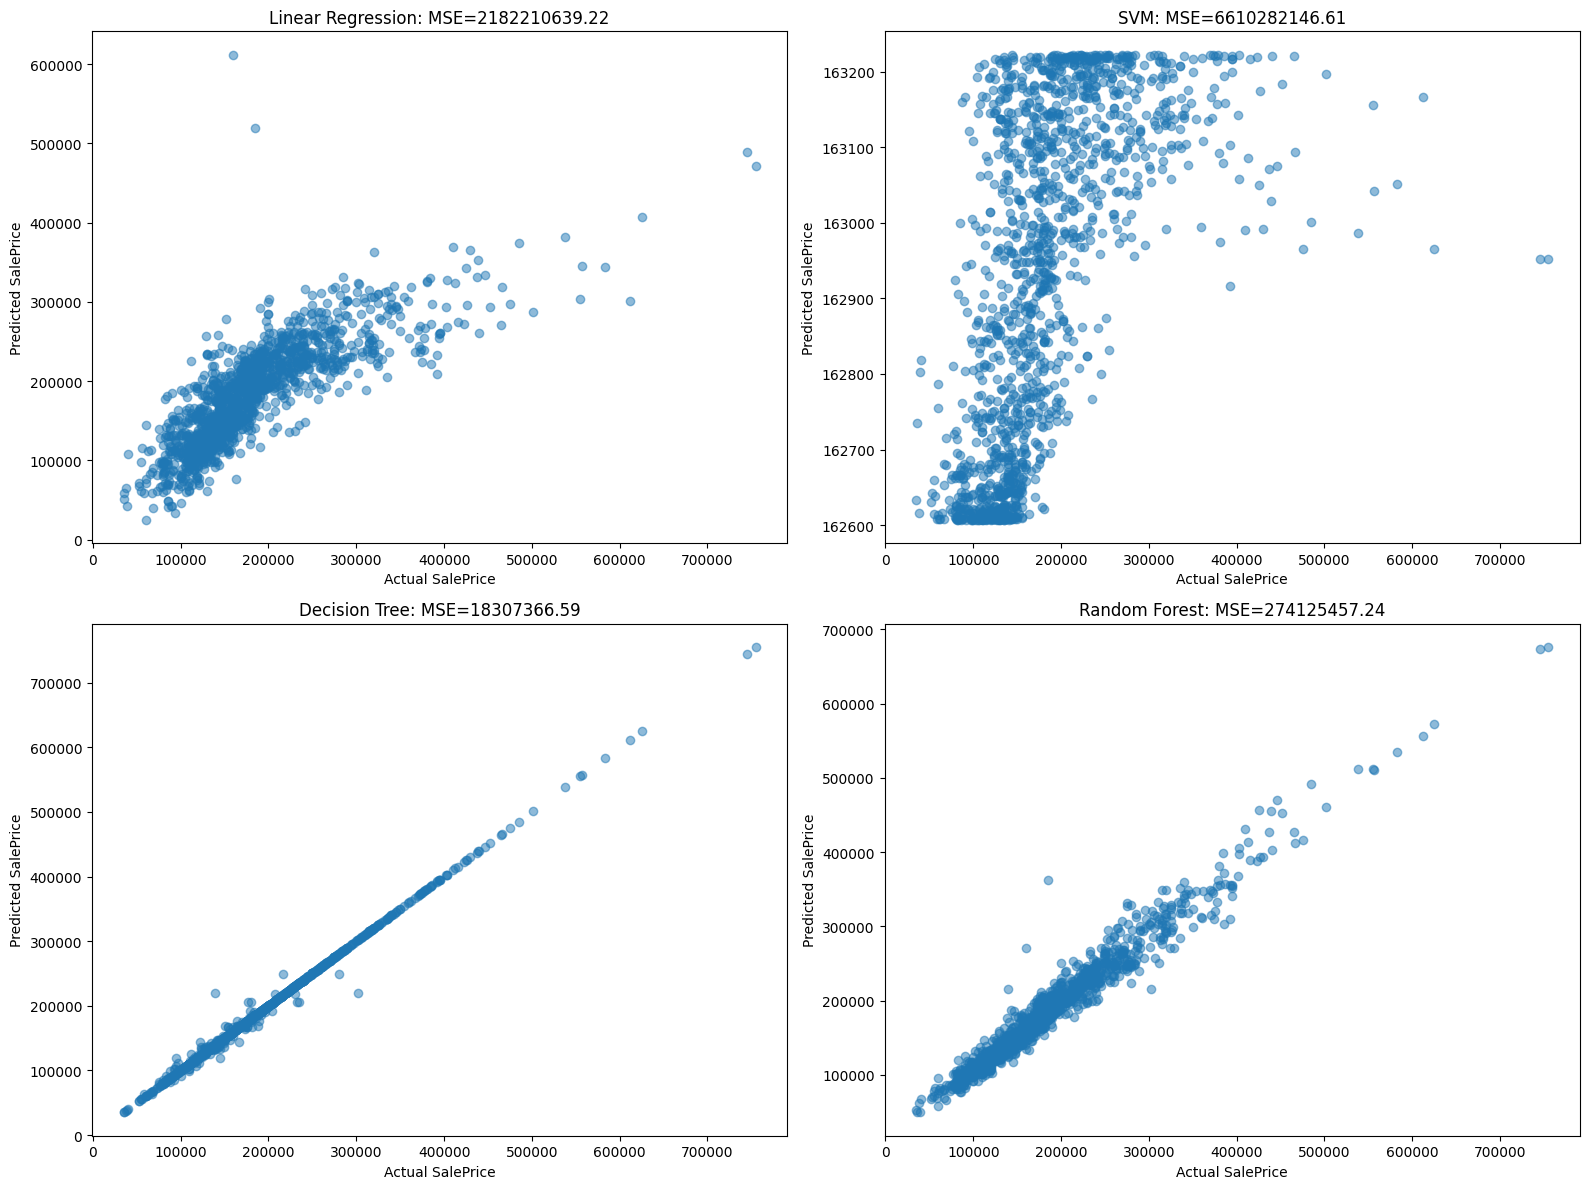

              Method           MSE
0  Linear Regression  2.182211e+09
1                SVM  6.610282e+09
2      Decision Tree  1.830737e+07
3      Random Forest  2.741255e+08


In [3]:
# Problem 3: Comparison of methods

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Defining models
models = {
    "Linear Regression": LinearRegression(),
    "SVM": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

results = {}

plt.figure(figsize=(16,12))

for idx, (name, model) in enumerate(models.items()):
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    results[name] = mse

    # Plot
    plt.subplot(2, 2, idx+1)
    plt.scatter(y, y_pred, alpha=0.5)
    plt.xlabel("Actual SalePrice")
    plt.ylabel("Predicted SalePrice")
    plt.title(f"{name}: MSE={mse:.2f}")

plt.tight_layout()
plt.show()

# Showing results table
results_df = pd.DataFrame(list(results.items()), columns=["Method", "MSE"])
print(results_df)


In [4]:
# Problem 4: (Advance assignment) Learning using other features

# Picking some additional features
X_more = df[['GrLivArea', 'YearBuilt', 'OverallQual', 'TotalBsmtSF', 'GarageCars']]

# Training same models again
results_more = {}

for name, model in models.items():
    model.fit(X_more, y)
    y_pred = model.predict(X_more)
    mse = mean_squared_error(y, y_pred)
    results_more[name] = mse

# Comparing old vs new
results_more_df = pd.DataFrame({
    "Method": list(results.keys()),
    "MSE (2 features)": list(results.values()),
    "MSE (5 features)": list(results_more.values())
})

print(results_more_df)


              Method  MSE (2 features)  MSE (5 features)
0  Linear Regression      2.182211e+09      1.463421e+09
1                SVM      6.610282e+09      6.616558e+09
2      Decision Tree      1.830737e+07      1.765312e+06
3      Random Forest      2.741255e+08      1.395414e+08


**Observation**

* In Problem 4 above, I used the additional three features (OverallQual, TotalBsmtSF and GarageCars) along with the initial two (GrLivArea and YearBuilt) to determine their effect on the performance of the models.

* Having compared the value of MSEs, I noticed that in each of the four methods (Linear Regression, SVM, Decision Tree, Random Forest) the value of MSE was lower when we had five features than in the case of two features. This indicates that increasing the additional features that are also relevant can enable the models to capture the variation in the house prices.

* Nevertheless, excessive feature introduction without earlier processing may cause overfitting or demand to use higher methods of feature selection or regularization.

* In general, more feature usage enhanced the results of prediction in this experiment.